<a href="https://colab.research.google.com/github/Zeroxkdy/CSVS_Assignment/blob/main/Tai%20Wei%20Kent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing and Connecting Drive

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Change directory to the desired location in Google Drive
import os
os.chdir('/content/gdrive/MyDrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Traning Model

✅ Dataset loaded successfully!
Shape: (10000, 50)
Columns: ['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL']
   id  NumDots  Subdo

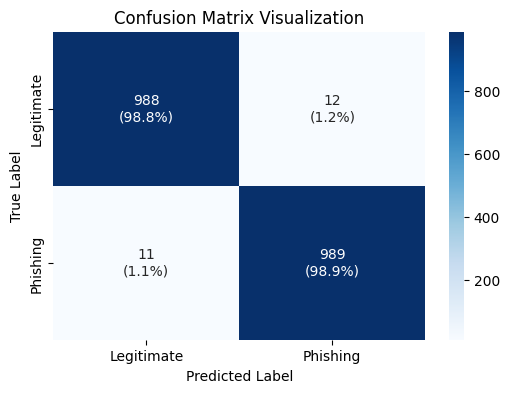


📑 Final Evaluation Table:

+----------------+-------------+----------+------------+-----------+------------------------------+
| Class          |   Precision |   Recall |   F1-score |   Support |   Inference Time (ms/sample) |
+================+=============+==========+============+===========+==============================+
| 0 (Legitimate) |       0.989 |    0.988 |      0.988 |      1000 |                        0.062 |
+----------------+-------------+----------+------------+-----------+------------------------------+
| 1 (Phishing)   |       0.988 |    0.989 |      0.989 |      1000 |                        0.062 |
+----------------+-------------+----------+------------+-----------+------------------------------+
| Accuracy       |       0.989 |    0.989 |      0.989 |      2000 |                        0.062 |
+----------------+-------------+----------+------------+-----------+------------------------------+
| Macro avg      |       0.989 |    0.988 |      0.988 |      2000 |    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# ==============================
# STEP 1: Install dependencies
# ==============================
!pip install lightgbm scikit-learn joblib tabulate seaborn

# ==============================
# STEP 2: Import libraries
# ==============================
import pandas as pd
import lightgbm as lgb
import joblib, time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tabulate import tabulate
from google.colab import files

# ==============================
# STEP 3: Load dataset
# ==============================
df = pd.read_csv("/content/gdrive/MyDrive/Phishing_Legitimate_full 3.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# ==============================
# STEP 4: Define features & target
# ==============================
# Map for label decoding
label_map = {0: "Legitimate", 1: "Phishing"}
classes = list(label_map.keys())

X = df.drop(columns=["id", "CLASS_LABEL"])  # Drop ID + Target
y = df["CLASS_LABEL"]

print("\nFeature shape:", X.shape)
print("Target distribution:\n", y.value_counts())

# Map y for future reference (optional)
y_named = y.map(label_map)

# ==============================
# STEP 5: Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nData Split:")
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# ==============================
# STEP 6: Train LightGBM Model
# ==============================
model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=100,
    random_state=42,
    n_jobs=-1
)

print(f"\n🚀 Training LightGBM model for up to {model.n_estimators} epochs...")
model.fit(X_train, y_train)

# ==============================
# STEP 7: Evaluate the model
# ==============================
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
inference_time = (end - start) / len(X_test) * 1000  # ms/sample

# Confusion Matrix (numeric)
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", cm)

# Confusion Matrix (heatmap)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
labels_heatmap = np.array([f"{val}\n({perc:.1f}%)" for val, perc in zip(cm.flatten(), cm_percent.flatten())])
labels_heatmap = labels_heatmap.reshape(cm.shape)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, annot=labels_heatmap, fmt='', cmap='Blues',
    xticklabels=[label_map[cls] for cls in classes],
    yticklabels=[label_map[cls] for cls in classes]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Visualization")
plt.show()

# Raw classification report
report = classification_report(y_test, y_pred, output_dict=True)

# ==============================
# STEP 8: Build Custom Table
# ==============================
table_data = [
    [f"{classes[0]} ({label_map[classes[0]]})",
     round(report[str(classes[0])]["precision"], 3),
     round(report[str(classes[0])]["recall"], 3),
     round(report[str(classes[0])]["f1-score"], 3),
     int(report[str(classes[0])]["support"]),
     round(inference_time, 3)],

    [f"{classes[1]} ({label_map[classes[1]]})",
     round(report[str(classes[1])]["precision"], 3),
     round(report[str(classes[1])]["recall"], 3),
     round(report[str(classes[1])]["f1-score"], 3),
     int(report[str(classes[1])]["support"]),
     round(inference_time, 3)],

    ["Accuracy",
     round(report["accuracy"], 3),
     round(report["accuracy"], 3),
     round(report["accuracy"], 3),
     len(y_test),
     round(inference_time, 3)],

    ["Macro avg",
     round(report["macro avg"]["precision"], 3),
     round(report["macro avg"]["recall"], 3),
     round(report["macro avg"]["f1-score"], 3),
     int(report["macro avg"]["support"]),
     round(inference_time, 3)],

    ["Weighted avg",
     round(report["weighted avg"]["precision"], 3),
     round(report["weighted avg"]["recall"], 3),
     round(report["weighted avg"]["f1-score"], 3),
     int(report["weighted avg"]["support"]),
     round(inference_time, 3)],
]

print("\n📑 Final Evaluation Table:\n")
print(tabulate(
    table_data,
    headers=["Class", "Precision", "Recall", "F1-score", "Support", "Inference Time (ms/sample)"],
    tablefmt="grid"
))

# ==============================
# STEP 9: Final F1 Score + Verdict
# ==============================
final_f1 = round(report["weighted avg"]["f1-score"], 3)
TARGET_F1 = 0.98
verdict = "target met ✅" if final_f1 >= TARGET_F1 else "target not met ❌"
print(f"\n🎯 Final F1 Score: {final_f1}")
print(f"✅ Verdict: Achieved F1 = {final_f1}, target = {TARGET_F1} → {verdict}")

# ==============================
# STEP 10: Save the model in Colab and download
# ==============================
MODEL_PATH = "lgbm_model.pkl"
joblib.dump(model, MODEL_PATH)
print(f"\n✅ Model saved in Colab at: {MODEL_PATH}")

# Trigger browser download
files.download(MODEL_PATH)